<a href="https://colab.research.google.com/github/AnthonyGachuru/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/AnthonyG_LS_DS_133_Introduction_to_Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference

!['Detector! What would the Bayesian statistician say if I asked him whether the--' [roll] 'I AM A NEUTRINO DETECTOR, NOT A LABYRINTH GUARD. SERIOUSLY, DID YOUR BRAIN FALL OUT?' [roll] '... yes.'](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)

*[XKCD 1132](https://www.xkcd.com/1132/)*


## Prepare - Bayes' Theorem and the Bayesian mindset

Bayes' theorem possesses a near-mythical quality - a bit of math that somehow magically evaluates a situation. But this mythicalness has more to do with its reputation and advanced applications than the actual core of it - deriving it is actually remarkably straightforward.

### The Law of Total Probability

By definition, the total probability of all outcomes (events) if some variable (event space) $A$ is 1. That is:

$$P(A) = \sum_n P(A_n) = 1$$

The law of total probability takes this further, considering two variables ($A$ and $B$) and relating their marginal probabilities (their likelihoods considered independently, without reference to one another) and their conditional probabilities (their likelihoods considered jointly). A marginal probability is simply notated as e.g. $P(A)$, while a conditional probability is notated $P(A|B)$, which reads "probability of $A$ *given* $B$".

The law of total probability states:

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

In words - the total probability of $A$ is equal to the sum of the conditional probability of $A$ on any given event $B_n$ times the probability of that event $B_n$, and summed over all possible events in $B$.





### The Law of Conditional Probability

What's the probability of something conditioned on something else? To determine this we have to go back to set theory and think about the intersection of sets:

The formula for actual calculation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

![Visualization of set intersection](https://upload.wikimedia.org/wikipedia/commons/9/99/Venn0001.svg)

Think of the overall rectangle as the whole probability space, $A$ as the left circle, $B$ as the right circle, and their intersection as the red area. Try to visualize the ratio being described in the above formula, and how it is different from just the $P(A)$ (not conditioned on $B$).

We can see how this relates back to the law of total probability - multiply both sides by $P(B)$ and you get $P(A|B)P(B) = P(A \cap B)$ - replaced back into the law of total probability we get $P(A) = \sum_n P(A \cap B_n)$.

This may not seem like an improvement at first, but try to relate it back to the above picture - if you think of sets as physical objects, we're saying that the total probability of $A$ given $B$ is all the little pieces of it intersected with $B$, added together. The conditional probability is then just that again, but divided by the probability of $B$ itself happening in the first place.


### Bayes Theorem

Here is is, the seemingly magic tool:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In words - the probability of $A$ conditioned on $B$ is the probability of $B$ conditioned on $A$, times the probability of $A$ and divided by the probability of $B$. These unconditioned probabilities are referred to as "prior beliefs", and the conditioned probabilities as "updated."

Why is this important? Scroll back up to the XKCD example - the Bayesian statistician draws a less absurd conclusion because their prior belief in the likelihood that the sun will go nova is extremely low. So, even when updated based on evidence from a detector that is $35/36 = 0.972$ accurate, the prior belief doesn't shift enough to change their overall opinion.

### A single-run Bayes Theorem application

There's many examples of Bayes' theorem - one less absurd example is to apply to [breathalyzer tests](https://www.bayestheorem.net/breathalyzer-example/). You may think that a breathalyzer test that is 100% accurate for true positives (detecting somebody who is drunk) is pretty good, but what if it also has 8% false positives (indicating somebody is drunk when they're not)? And furthermore, the rate of drunk driving (and thus our prior belief)  is 1/1000.

What is the likelihood somebody really is drunk if they test positive? Some may guess it's 92% - the difference between the true positives and the false positives. But we have a prior belief of the background/true rate of drunk driving. Sounds like a job for Bayes' theorem!

$$
\begin{aligned}
P(Drunk | Positive) &= \frac{P(Positive | Drunk)P(Drunk)}{P(Positive)} \\
&= \frac{1 \times 0.001}{0.08} \\
&= 0.0125
\end{aligned}
$$

In other words, the likelihood that somebody is drunk given they tested positive with a breathalyzer in this situation is only 1.25% - probably much lower than you'd guess. This is why, in practice, it's important to have a repeated test to confirm (the probability of two false positives in a row is $0.08 * 0.08 = 0.0064$, much lower), and Bayes' theorem has been relevant in court cases where proper consideration of evidence was important.

### Using Bayes Theorem Iteratively (repeated testing)

This example comes from [Wikipedia](https://en.wikipedia.org/wiki/Bayes%27_theorem)

Suppose that a test for using a particular drug is 99% sensitive and 99% specific. That is, the test will produce 99% true positive results for drug users and 99% true negative results for non-drug users. Suppose that 0.5% of people are users of the drug. What is the probability that a randomly selected individual with a positive test is a drug user?

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/95c6524a3736c43e4bae139713f3df2392e6eda9)

Even if an individual tests positive, it is more likely that they do not use the drug than that they do. This is because the number of non-users is large compared to the number of users. The number of false positives outweighs the number of true positives. For example, if 1000 individuals are tested, there are expected to be 995 non-users and 5 users. From the 995 non-users, 0.01 × 995 ≃ 10 false positives are expected. From the 5 users, 0.99 × 5 ≈ 5 true positives are expected. Out of 15 positive results, only 5 are genuine.

The importance of specificity in this example can be seen by calculating that even if sensitivity is raised to 100% and specificity remains at 99% then the probability of the person being a drug user only rises from 33.2% to 33.4%, but if the sensitivity is held at 99% and the specificity is increased to 99.5% then the probability of the person being a drug user rises to about 49.9%.


In [47]:
(0.99 * 0.332)/((0.99 * 0.005) + (0.001 * 0.995))

55.286795626576954

In [49]:
(0.99 * 0.55286)/((0.99 * 0.005) + (0.001 * 0.995))

92.06583683767872

In [0]:
#Pseudocode

def bayes_theorem(prior, false_positive, false_negative, num_iterations):
  probabilities = []
  for n in range(sum_itearions):
    posterior probabilities = 
    probabilities.append(posterior_probabilities)
    
  return probabilities

##Functions

In [42]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.DataFrame({'a': [1, 2, 3, 4, 5], 'b': [4, 5, 6, 7, 8]})
df.head()

,a,b
0,1,4
1,2,5
2,3,6
3,4,7
4,5,8


In [0]:
def confidence_interval(data, confidence_level=0.95):
  sample_mean = np.mean(data)
  sample_size = len(data)
  sample_std_dev = np.std(data, ddof=1)
  standard_error = sample_std_dev / (sample_size**.5)
  margin_of_error = standard_error * stats.t.ppf((1+ confidence_level) / 2.0, sample_size - 1)
  return (sample_mean, sample_mean - margin_of_error, sample_mean + margin_of_error)

In [44]:
def column_means(dataframe):
  
  mean_list = [] #Important to declare container outside for loop
  for col in dataframe:
    print('running the for loop')
    
    numpy_column = dataframe[col].values
    mean = sum((numpy_column)/len(dataframe[col].values))
    #print(dataframe[col].tolist())
    mean_list.append(mean)
  return mean_list # Return value outside our for loop
#Thing after the return statement will not print
    

column_means(df)

running the for loop
running the for loop


[3.0, 6.0]

In [45]:
def df_column_confidence_interval(dataframe): #Parameter
  
  confidence_interval_list = [] #Important to declare container outside for loop
  for col in dataframe:
    numpy_column = dataframe[col].values
    CI = confidence_interval(numpy_column)
    confidence_interval_list.append(CI)
  return confidence_interval_list # Return value outside our for loop
#Thing after the return statement will not print
    

df_column_confidence_interval(df)

[(3.0, 1.036756838522439, 4.9632431614775605),
 (6.0, 4.0367568385224395, 7.9632431614775605)]

In [0]:
??pd.read_csv()

## Live Lecture - Deriving Bayes' Theorem, Calculating Bayesian Confidence

Notice that $P(A|B)$ appears in the above laws - in Bayesian terms, this is the belief in $A$ updated for the evidence $B$. So all we need to do is solve for this term to derive Bayes' theorem. Let's do it together!

In [51]:
# Activity 2 - Use SciPy to calculate Bayesian confidence intervals
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html#scipy.stats.bayes_mvs

#Set random seed for reproducibility
np.random.seed(seed=42)

coinflips = np.random.binomial(n = 1, p = .5, size = 100)
print(coinflips)

[0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0
 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1
 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0]


In [52]:
#FREQUENTIST APPROACH
def conf_int(data, confidence_level=0.95):
  n = len(data)
  mean = sum(data)/n
  data = np.array(data)
  std_err = stats.sem(data)
  Interval = std_err * stats.t.ppf((1+ confidence_level) / 2.0, n - 1)
  return (mean, mean - Interval, mean + Interval)

conf_int(coinflips)

(0.47, 0.3704689875017368, 0.5695310124982632)

In [55]:
#BAYESIAN APPROACH
#alpha = 1 - confidence_level
#95% Confidence: alpha = .05
#99% Confident: alpha = .01
#mvs - mean, variance, std
mean_confidence_interval, _, _ = stats.bayes_mvs(coinflips, alpha = 0.95)
print(mean_confidence_interval)

Mean(statistic=0.47, minmax=(0.37046898750173674, 0.5695310124982632))


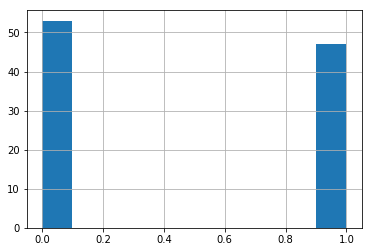

In [56]:
coinflip_series = pd.Series(coinflips)

coinflip_series.hist()

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)